In [10]:
import pickle
from nuance.utils import periodic_transit
import numpy as np

i = 0
data_path = "/Users/lgrcia/code/studies/paper-nuance/workflows/real_injection_recovery/data/29923559/lc.fluxes"
params_path = "/Users/lgrcia/code/studies/paper-nuance/workflows/real_injection_recovery/data/29923559/params.values"
gp_path = "/Users/lgrcia/code/studies/paper-nuance/workflows/real_injection_recovery/data/29923559/gp.yaml"

In [11]:
import pickle

import numpy as np
from nuance.star import Star
from nuance.utils import periodic_transit

data = pickle.load(open(data_path, "rb"))
periods, radii = pickle.load(open(params_path, "rb"))

star = Star(
    data["star_radius"], data["star_mass"], data["star_amplitude"], data["star_period"]
)

np.random.seed(i)
period = periods[i]
radius = radii[i]
tau = star.period2tau(period)
delta = star.radius2delta(radius)
duration = star.transit_duration(period)
depth = star.transit_depth(radius)

t0 = np.random.rand() * period

transit = depth * periodic_transit(data["time"], t0, duration, P=period)

In [13]:
import yaml
from nuance.kernels import rotation

build_gp, init = rotation(data["star_period"], np.mean(data["error"]), long_scale=0.5)
gp = build_gp(ya)

NameError: name 'ya' is not defined

In [ ]:
build_gp, init = rotation(data["star_period"], np.mean(data["error"]), long_scale=0.5)

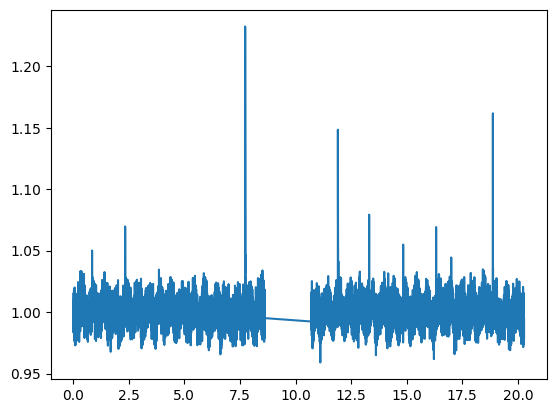

In [8]:
import matplotlib.pyplot as plt

plt.plot(data["time"], data["flux"])

In [ ]:
injected_flux = data["flux"] + transit

data["flux"] = injected_flux
data["transit_t0"] = t0
data["transit_duration"] = duration
data["transit_depth"] = depth
data["delta"] = delta
data["tau"] = tau
data["planet_period"] = period
data["planet_radius"] = radius
output = snakemake.output[0]
pickle.dump(data, open(output, "wb"))

In [37]:
data2 = pickle.load(open("/Users/lgrcia/code/studies/paper-nuance/workflows/real_injection_recovery/data/125258133/params.values", "rb"))

In [39]:
data["amplitude"]/(2*0.0012735077751137957)

3.042776868522648

In [27]:
np.random.seed(i)

n = np.linspace(0.1, 8, 20) 
taus, deltas = np.meshgrid(n, n)
taus, deltas = taus.flatten(), deltas.flatten()
tau, delta = 7, 7
duration = data["period"]/(2*tau)
depth = 2*data["amplitude"]/delta
period = 2.2

transit = depth * periodic_transit(data["time"], np.random.rand(), duration, P=period)
injected_flux = data["flux"] + transit

In [28]:
(depth/np.median(data["error"])) * np.sqrt(period*duration/np.median(np.diff(data["time"])))

2.071250103463461

In [13]:
data["flux"] = injected_flux
output = "test.lc"
pickle.dump(data, open(output, "wb"))

In [9]:
from astropy.constants import G

In [13]:
G.value

6.6743e-11

In [ ]:
def _taudelta_to_RP(tau_v, delta_v):
    depth = 2*sigma/delta_v
    Rp = np.sqrt(depth)*Rs
    
    T = (np.pi/(omega*tau_v)).to(u.hour)
    a = (c.G * Ms * T**2) / (4*(Rs**2))

    P = 2*np.pi*a**(3/2) / np.sqrt(c.G * Ms)
    P = P.decompose().to(u.day)
    
    n_tr = (duration/P).decompose()
    snr = (depth/w)*np.sqrt(n_tr*(T/dt).decompose())
    
    return Rp.to(u.R_earth).value, P.decompose().to(u.day).value, snr

taudelta_to_RP = np.vectorize(_taudelta_to_RP)
    
def _snr(Rp, P):
    P = P * u.day
    Rp = Rp * u.R_earth
    
    depth = (Rp/Rs)**2
    a = ((c.G*Ms*(P**2))/(4*(np.pi**2)))**(1/3)
    T = (P*Rs)/(np.pi*a)    
    n_tr = (duration/P)
    return (depth/w)*np.sqrt(n_tr*(T/dt))

SNR = np.vectorize(_snr)

def _RP_to_taudelta(Rp, P):
    P = P * u.day
    Rp = Rp * u.R_earth
    
    depth = (Rp/Rs)**2
    delta_v = (2*sigma/depth).decompose()
    a = ((c.G*Ms*(P**2))/(4*(np.pi**2)))**(1/3)
    T = (P*Rs)/(np.pi*a)
    
    tau_v = (np.pi/(omega*T))
    
    n_tr = (duration/P)
    snr = (depth/w)*np.sqrt(n_tr*(T/dt))
    
    return float(tau_v.decompose()), float(delta_v.decompose()), float(snr.decompose())